# Data Exploration: Lookup Tables & Unannotated CVs

This notebook explores the **training data sources** available for the zero-shot learning problem:
- `department-v2.csv` - Job title → department mappings (~10k examples)
- `seniority-v2.csv` - Job title → seniority mappings (~9k examples)
- `linkedin-cvs-not-annotated.json` - Unannotated LinkedIn CVs for inference

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import json

# Import our data loaders
import sys
sys.path.append('../')
from src.data.loader import load_label_lists, load_inference_dataset

# Setup plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Paths
DATA_DIR = Path('../data')

## 1. Load Lookup Tables (Training Data)

In [17]:
# Load department and seniority lookup tables
dept_df, sen_df = load_label_lists(DATA_DIR)

print(f"Department lookup: {len(dept_df):,} examples")
print(f"Seniority lookup:  {len(sen_df):,} examples")
print(f"\nTotal training examples: {len(dept_df) + len(sen_df):,}")

Department lookup: 10,145 examples
Seniority lookup:  9,428 examples

Total training examples: 19,573


## 2. Department Labels Analysis

In [18]:
# Label distribution
dept_counts = dept_df['label'].value_counts()
print("Department Label Distribution:")
print(dept_counts)
print(f"\nNumber of unique departments: {len(dept_counts)}")

Department Label Distribution:
label
Marketing                 4295
Sales                     3328
Information Technology    1305
Business Development       620
Project Management         201
Consulting                 167
Administrative              83
Other                       42
Purchasing                  40
Customer Support            33
Human Resources             31
Name: count, dtype: int64

Number of unique departments: 11


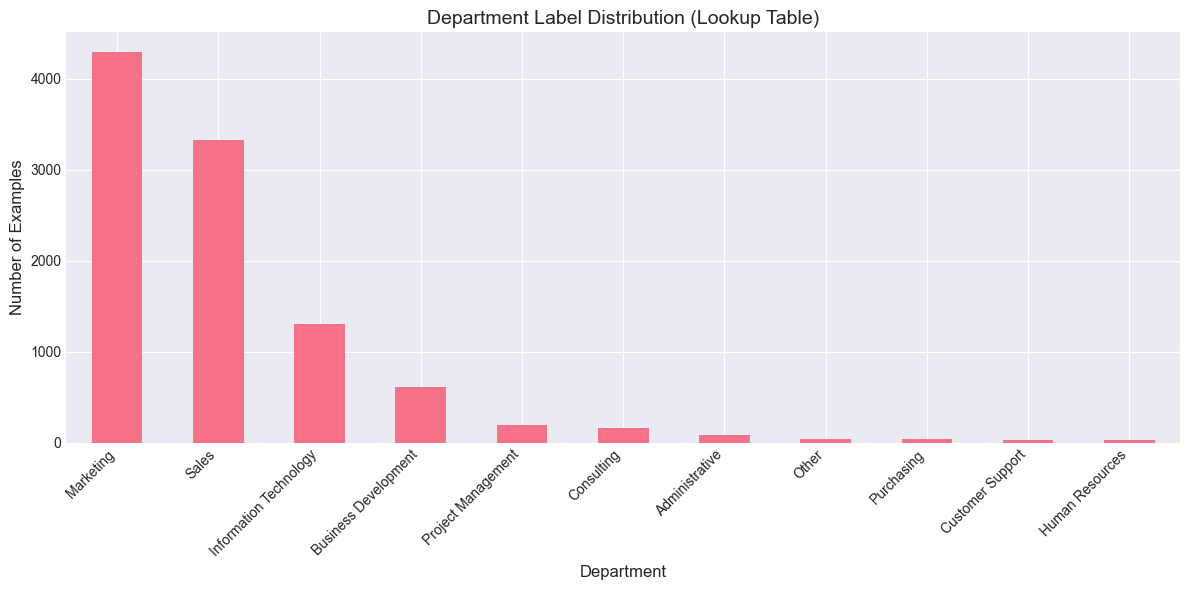

In [19]:
# Visualize department distribution
plt.figure(figsize=(12, 6))
dept_counts.plot(kind='bar')
plt.title('Department Label Distribution (Lookup Table)', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Examples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Example job titles per department
print("\nExample job titles per department:\n")
for dept in dept_counts.head(5).index:
    examples = dept_df[dept_df['label'] == dept]['text'].head(5).tolist()
    print(f"\n{dept}:")
    for ex in examples:
        print(f"  - {ex}")


Example job titles per department:


Marketing:
  - Adjoint directeur communication
  - Cadre marketing digital
  - Chargé de communication
  - Chargé de communication digitale
  - Chargé de communication et marketing

Sales:
  - ? B2B | B2C - Unlocking potential - Hospitality software solutions/development/outsourcing/product development ?- Business development | Sales | forecasting | planning ?
  - ✯ Principal CRM Solution Architect ✯ Large Scale Enterprise Initiatives ✯ Salesforce ✯ Sales & Service Operations
  - •Sales manager customized induction ranges & prof. kitchen designer
  - Account Coordinator National Sales
  - Accountmanager

Information Technology:
  - 3rd Level IT Engineer
  - Abteilung »Digitaler Technologietransfer«
  - Admin / IT
  - Administradora de Empresas
  - Administrateur des Systèmes d'Information

Business Development:
  - Accelerating Business Innovation & Efficiency
  - Administrateur Business applications
  - Analyst Strategy & Business Development
  - 

## 3. Seniority Labels Analysis

In [21]:
# Label distribution
sen_counts = sen_df['label'].value_counts()
print("Seniority Label Distribution:")
print(sen_counts)
print(f"\nNumber of unique seniority levels: {len(sen_counts)}")

Seniority Label Distribution:
label
Senior        3733
Lead          3546
Director       984
Management     756
Junior         409
Name: count, dtype: int64

Number of unique seniority levels: 5


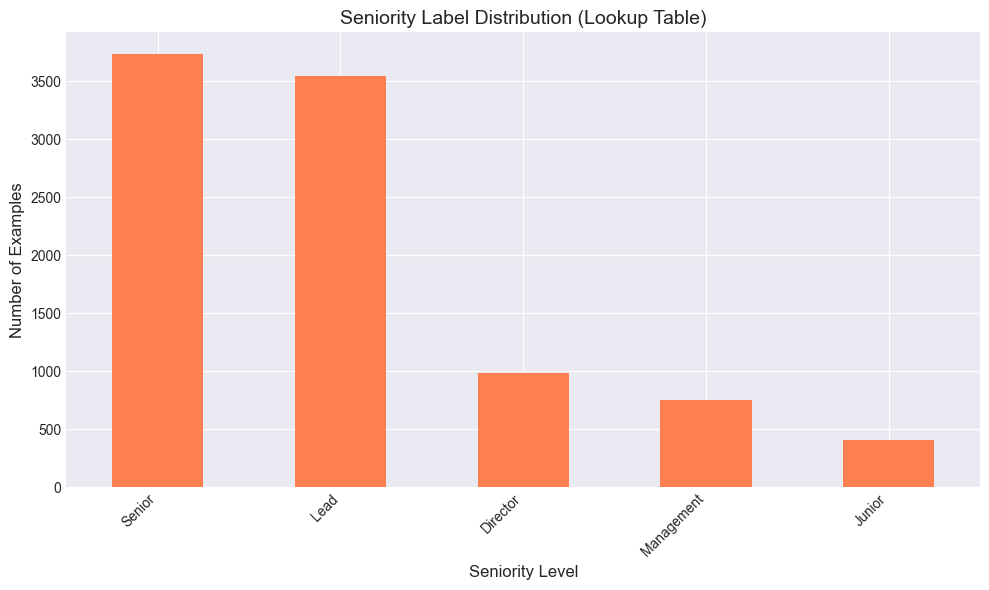

In [22]:
# Visualize seniority distribution
plt.figure(figsize=(10, 6))
sen_counts.plot(kind='bar', color='coral')
plt.title('Seniority Label Distribution (Lookup Table)', fontsize=14)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Number of Examples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
# Example job titles per seniority level
print("\nExample job titles per seniority level:\n")
for sen in sen_counts.index:
    examples = sen_df[sen_df['label'] == sen]['text'].head(5).tolist()
    print(f"\n{sen}:")
    for ex in examples:
        print(f"  - {ex}")


Example job titles per seniority level:


Senior:
  - Application Engineer
  - Applications Engineer
  - Data Engineering & visualization
  - DevOps as a Service. We're hiring Engineers in North America
  - Directeur Commercial - Responsable Filiale Europe du Sud / Groupe EControls

Lead:
  - Architecte SI - Chef de projet Applicatif
  - Chargée de communication / Chef de projet événementiel
  - Chef de marché Résidences services senior - Solutions logicielles métier
  - Chef de projet
  - Chef de projet communication et marketing

Director:
  - Abteilungsdirektor
  - Abteilungsdirektor Vermögensverwalter Office
  - Account Director
  - Area Director & General Manager EMEA Central
  - Art Director

Management:
  - Vorsitz
  - Vorsitzende
  - Vorsitzende des Aufsichtsrates
  - Vorsitzender
  - Vorsitzender Aufsichtsrat

Junior:
  - Analyst
  - Analyste financier
  - Anwendungstechnischer Mitarbeiter
  - Associate
  - Associate - Research


## 4. Text Length Analysis

In [24]:
# Compute text statistics
dept_df['text_length'] = dept_df['text'].str.len()
dept_df['word_count'] = dept_df['text'].str.split().str.len()

sen_df['text_length'] = sen_df['text'].str.len()
sen_df['word_count'] = sen_df['text'].str.split().str.len()

print("Department job titles:")
print(f"  Avg length: {dept_df['text_length'].mean():.1f} chars")
print(f"  Avg words:  {dept_df['word_count'].mean():.1f} words")

print("\nSeniority job titles:")
print(f"  Avg length: {sen_df['text_length'].mean():.1f} chars")
print(f"  Avg words:  {sen_df['word_count'].mean():.1f} words")

Department job titles:
  Avg length: 33.8 chars
  Avg words:  4.3 words

Seniority job titles:
  Avg length: 33.8 chars
  Avg words:  4.3 words


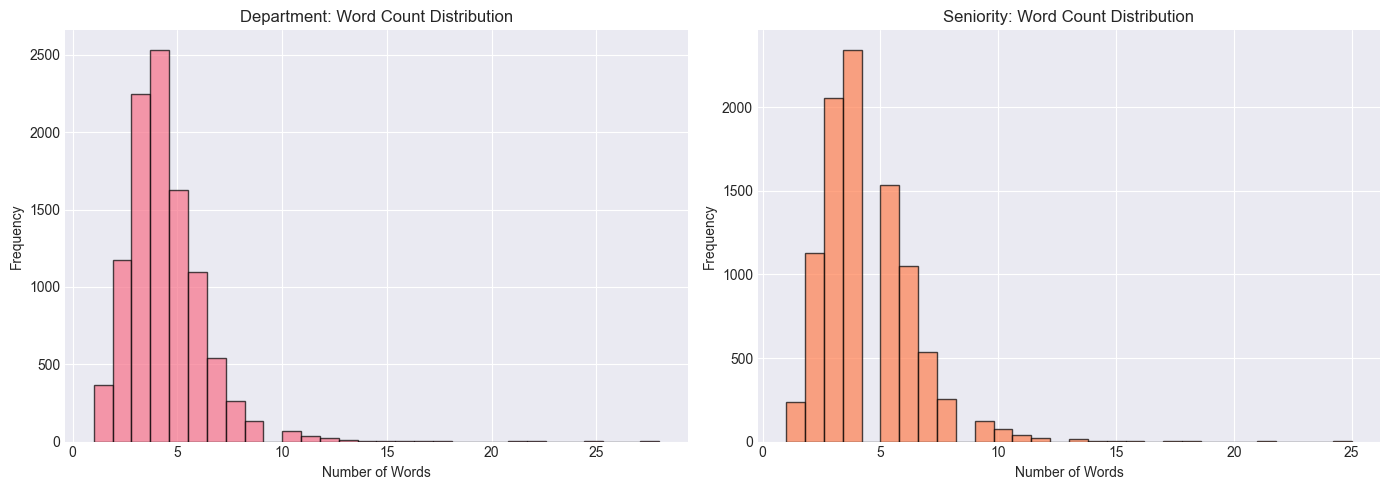

In [25]:
# Visualize word count distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(dept_df['word_count'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Department: Word Count Distribution', fontsize=12)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')

axes[1].hist(sen_df['word_count'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Seniority: Word Count Distribution', fontsize=12)
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Load Unannotated LinkedIn CVs

In [26]:
# Load unannotated CVs (for inference demonstration)
inference_df = load_inference_dataset(DATA_DIR)

print(f"Unannotated LinkedIn CVs: {len(inference_df):,} positions")
print(f"\nColumns: {list(inference_df.columns)}")
print(f"\nFirst few examples:")
inference_df.head()

Unannotated LinkedIn CVs: 314 positions

Columns: ['cv_id', 'title', 'company', 'text']

First few examples:


,cv_id,title,company,text
0,0,Bookkeeper,"Keeping The Books, Bookkeeping","Bookkeeper at Keeping The Books, Bookkeeping"
1,1,Strategy & Investments,Erste Bank und Sparkasse,Strategy & Investments at Erste Bank und Spark...
2,2,Corporate Auditor,Guido Meyer,Corporate Auditor at Guido Meyer
3,4,Marketing Manager,Tradeware AG,Marketing Manager at Tradeware AG
4,5,Professor,Monash University,Professor at Monash University


In [27]:
# Analyze LinkedIn CV job titles
inference_df['text_length'] = inference_df['title'].str.len()
inference_df['word_count'] = inference_df['title'].str.split().str.len()

print("LinkedIn CV job titles:")
print(f"  Avg length: {inference_df['text_length'].mean():.1f} chars")
print(f"  Avg words:  {inference_df['word_count'].mean():.1f} words")
print(f"  Min/Max words: {inference_df['word_count'].min()} / {inference_df['word_count'].max()}")

LinkedIn CV job titles:
  Avg length: 24.0 chars
  Avg words:  3.0 words
  Min/Max words: 1 / 12


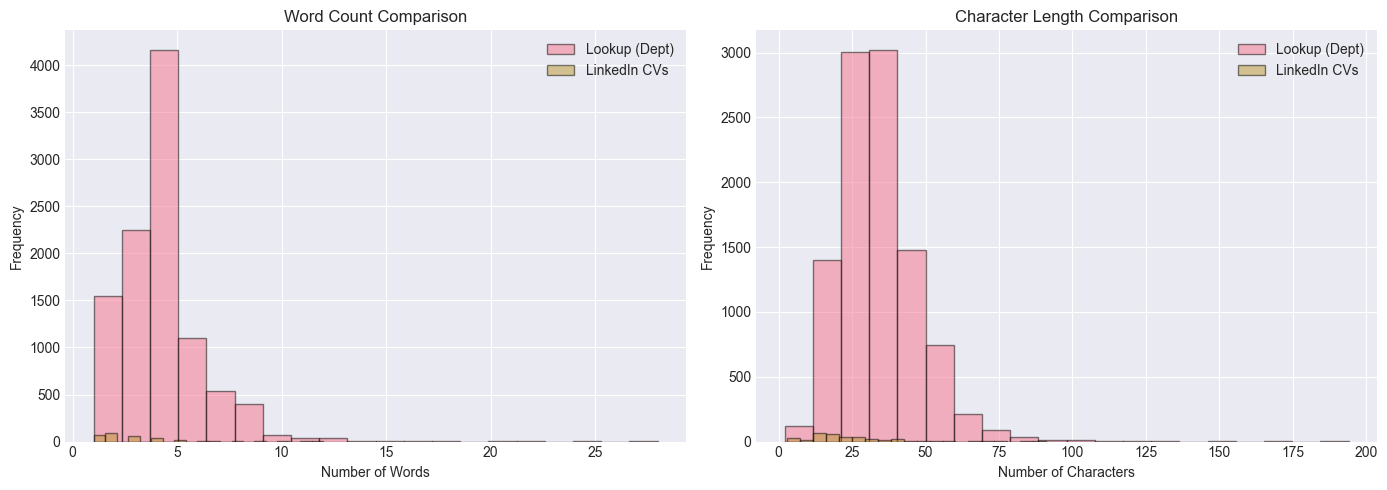

In [28]:
# Compare distributions: Lookup tables vs LinkedIn CVs
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word count comparison
axes[0].hist(dept_df['word_count'], bins=20, alpha=0.5, label='Lookup (Dept)', edgecolor='black')
axes[0].hist(inference_df['word_count'], bins=20, alpha=0.5, label='LinkedIn CVs', edgecolor='black')
axes[0].set_title('Word Count Comparison', fontsize=12)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Character length comparison
axes[1].hist(dept_df['text_length'], bins=20, alpha=0.5, label='Lookup (Dept)', edgecolor='black')
axes[1].hist(inference_df['text_length'], bins=20, alpha=0.5, label='LinkedIn CVs', edgecolor='black')
axes[1].set_title('Character Length Comparison', fontsize=12)
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

## 6. Language Detection

In [29]:
# Simple language detection based on keywords
def detect_language(text):
    text_lower = text.lower()
    
    # German indicators
    german_words = ['geschäftsführer', 'leiter', 'mitarbeiter', 'projektmanager', 
                    'entwickler', 'berater', 'assistent', 'sachbearbeiter']
    
    # French indicators
    french_words = ['responsable', 'directeur', 'chef', 'chargé', 'gérant', 'adjoint']
    
    if any(word in text_lower for word in german_words):
        return 'German'
    elif any(word in text_lower for word in french_words):
        return 'French'
    else:
        return 'English/Other'

# Detect languages
dept_df['language'] = dept_df['text'].apply(detect_language)
sen_df['language'] = sen_df['text'].apply(detect_language)
inference_df['language'] = inference_df['title'].apply(detect_language)

print("Language distribution in lookup tables:")
print("\nDepartment:")
print(dept_df['language'].value_counts())
print("\nSeniority:")
print(sen_df['language'].value_counts())
print("\nLinkedIn CVs:")
print(inference_df['language'].value_counts())

Language distribution in lookup tables:

Department:
language
English/Other    7829
German           2090
French            226
Name: count, dtype: int64

Seniority:
language
English/Other    6769
German           2445
French            214
Name: count, dtype: int64

LinkedIn CVs:
language
English/Other    273
German            36
French             5
Name: count, dtype: int64


## 7. Key Observations

### Distribution Mismatch
- Lookup tables have simpler, cleaner job titles
- LinkedIn CVs may have longer, more complex titles
- Need models that can generalize from lookup patterns to real-world CVs

### Label Imbalance
- Some departments/seniority levels have many more examples than others
- May need class weighting or stratified sampling

### Multilingual Challenge
- Data contains German, French, and English
- Need multilingual models (e.g., multilingual-BERT, sentence-transformers)

### Zero-Shot Setting
- No labeled LinkedIn CV data for training
- Must transfer knowledge from lookup table patterns
- Challenge: How well do lookup table patterns generalize?

## 8. Summary Statistics

In [30]:
# Create summary table
summary = pd.DataFrame({
    'Dataset': ['Department Lookup', 'Seniority Lookup', 'LinkedIn CVs (Unannotated)'],
    'Examples': [len(dept_df), len(sen_df), len(inference_df)],
    'Unique Labels': [dept_df['label'].nunique(), sen_df['label'].nunique(), 'N/A'],
    'Avg Words': [dept_df['word_count'].mean(), sen_df['word_count'].mean(), inference_df['word_count'].mean()],
    'Languages': ['Multi', 'Multi', 'Multi']
})

print("\n" + "="*60)
print("DATA SUMMARY")
print("="*60)
print(summary.to_string(index=False))
print("="*60)


DATA SUMMARY
                   Dataset  Examples Unique Labels  Avg Words Languages
         Department Lookup     10145            11   4.263677     Multi
          Seniority Lookup      9428             5   4.319474     Multi
LinkedIn CVs (Unannotated)       314           N/A   2.952229     Multi
